# Definizione economia D&D

## Implementazione classe City
- Popolazione divisa in lavoratori (in percentuale)
- Alleanze con altre città
- Guerre con altre città

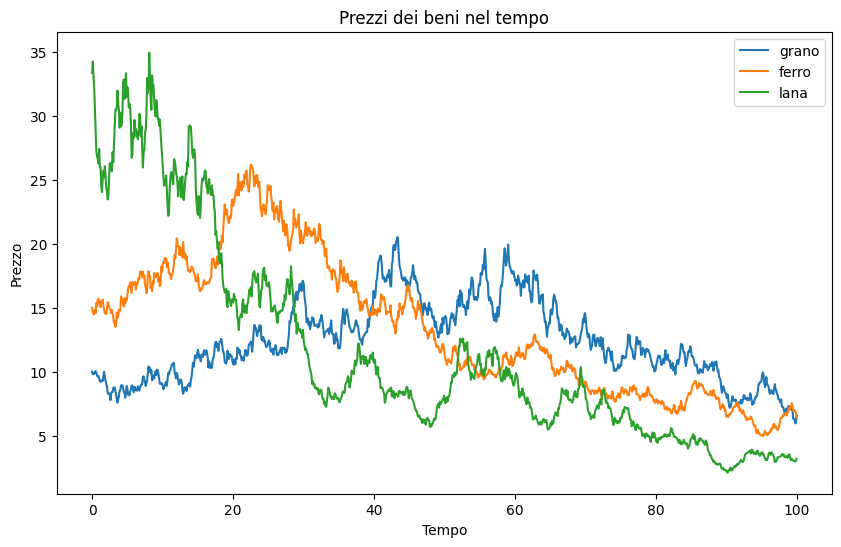

In [48]:
import numpy as np
import matplotlib.pyplot as plt

T = 100
dt = 0.1
N = int(T/dt)
t = np.linspace(0, T, N)

# Definizione dei beni
beni = {
    "grano": {"A0": 1000, "mu": 0.02, "sigma": 0.1, "prezzo_base": 10, "consumo": 0.2},
    "ferro": {"A0": 500, "mu": 0.01, "sigma": 0.08, "prezzo_base": 30, "consumo": 0.05},
    "lana": {"A0": 300, "mu": 0.015, "sigma": 0.12, "prezzo_base": 20, "consumo": 0.1}
}

popolazione = 5000

# Inizializza array per ogni bene
produzione = {bene: np.zeros(N) for bene in beni}
prezzi = {bene: np.zeros(N) for bene in beni}

for bene, param in beni.items():
    produzione[bene][0] = param["A0"]

# Simulazione nel tempo
for i in range(1, N):
    for bene, param in beni.items():
        dW = np.random.normal(0, np.sqrt(dt))
        produzione[bene][i] = max(
            produzione[bene][i-1] + param["mu"] * produzione[bene][i-1] * dt + param["sigma"] * produzione[bene][i-1] * dW,
            1
        )

# Calcolo prezzi dinamici
for bene, param in beni.items():
    domanda = popolazione * param["consumo"]
    prezzi[bene] = param["prezzo_base"] * (domanda / produzione[bene])

# Plot dei prezzi
plt.figure(figsize=(10,6))
for bene in beni:
    plt.plot(t, prezzi[bene], label=bene)
plt.title("Prezzi dei beni nel tempo")
plt.xlabel("Tempo")
plt.ylabel("Prezzo")
plt.legend()
plt.show()